# Load Dataset

data: https://www.kaggle.com/datasets/stanfordu/stanford-natural-language-inference-corpus


This project is an NLP-based sentence relationship detection system that classifies the relationship between two given sentences. The model determines whether the two statements support each other (Entailment) or conflict with each other (Contradiction). It is particularly useful in applications such as question answering, information validation, and logical consistency checking.

In [2]:
import pandas as pd 

df = pd.read_csv("snli_1.0_train.csv")

df = df[['sentence1','sentence2','label1']]
df

,sentence1,sentence2,label1
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment
3,Children smiling and waving at camera,They are smiling at their parents,neutral
4,Children smiling and waving at camera,There are children present,entailment
...,...,...,...
550147,Four dirty and barefooted children.,four kids won awards for 'cleanest feet',contradiction
550148,Four dirty and barefooted children.,"four homeless children had their shoes stolen,...",neutral
550149,A man is surfing in a bodysuit in beautiful bl...,A man in a bodysuit is competing in a surfing ...,neutral
550150,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...,contradiction


In [3]:
df = df.sample(n=5000, random_state=42).reset_index(drop=True)
df

,sentence1,sentence2,label1
0,An older gentleman in an orange jumpsuit and g...,A man is cleaning up around his house.,neutral
1,Boy and girl running along the beach.,Two people run on the beach.,entailment
2,Four men do repair work on a roof.,Four men work with tools.,entailment
3,A long-haired young man skateboarding on the r...,A girl is riding a bike.,contradiction
4,A band performs on stage.,People are listening to a rock concert.,neutral
...,...,...,...
4995,An older gentleman holding a can of coke and a...,The older man is holding a glass of beer.,contradiction
4996,"The gutarist upfront is under a spotlight, and...",A man is singing on stage alone.,contradiction
4997,A boy in a white t-shirt does skateboard tricks.,A boy is in a skateboard tournament.,neutral
4998,Two men are driving in opposite directions on ...,The two men are sitting on the ground.,contradiction


# Data Cleaning

In [6]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


# Apply lowercasing using lambda
df['sentence1'] = df['sentence1'].apply(lambda x: x.lower())
df['sentence2'] = df['sentence2'].apply(lambda x: x.lower())

# Remove stop words using lambda
df['sentence1'] = df['sentence1'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))
df['sentence2'] = df['sentence2'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

In [7]:
df

,sentence1,sentence2,label1
0,older gentleman orange jumpsuit gray hat curb ...,man cleaning house.,neutral
1,boy girl running beach.,people run beach.,entailment
2,men repair work roof.,men work tools.,entailment
3,long-haired young man skateboarding rails clou...,girl riding bike.,contradiction
4,band performs stage.,people listening rock concert.,neutral
...,...,...,...
4995,older gentleman holding coke young boy sort ma...,older man holding glass beer.,contradiction
4996,"gutarist upfront spotlight, drummer too.",man singing stage alone.,contradiction
4997,boy white t-shirt does skateboard tricks.,boy skateboard tournament.,neutral
4998,men driving opposite directions motorbikes man...,men sitting ground.,contradiction


In [9]:
df = df[df['label1'] != 'neutral']

df['input'] = df['sentence1'] + " " + df['sentence2']

df

C:\Users\Noor Saeed\AppData\Local\Temp\ipykernel_2928\2452468538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['input'] = df['sentence1'] + " " + df['sentence2']


,sentence1,sentence2,label1,input
1,boy girl running beach.,people run beach.,entailment,boy girl running beach. people run beach.
2,men repair work roof.,men work tools.,entailment,men repair work roof. men work tools.
3,long-haired young man skateboarding rails clou...,girl riding bike.,contradiction,long-haired young man skateboarding rails clou...
7,hispanic ladies wearing bright clothing crossi...,people female.,entailment,hispanic ladies wearing bright clothing crossi...
8,"young boy stands golf mat city horizon, golf c...",boy just swung golf club goft course.,entailment,"young boy stands golf mat city horizon, golf c..."
...,...,...,...,...
4994,police horseback outside protest.,police sitting horses outdoors.,entailment,police horseback outside protest. police sitti...
4995,older gentleman holding coke young boy sort ma...,older man holding glass beer.,contradiction,older gentleman holding coke young boy sort ma...
4996,"gutarist upfront spotlight, drummer too.",man singing stage alone.,contradiction,"gutarist upfront spotlight, drummer too. man s..."
4998,men driving opposite directions motorbikes man...,men sitting ground.,contradiction,men driving opposite directions motorbikes man...


# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split


X = df[['input']]
y = df['label1']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Text Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data, then transform the test data
X_train_tfidf = tfidf.fit_transform(X_train['input'])
X_test_tfidf = tfidf.transform(X_test['input'])

# Train and Eval ML Models

Training Logistic Regression...
Classification Report for Logistic Regression:

               precision    recall  f1-score   support

contradiction       0.61      0.64      0.63       347
   entailment       0.60      0.56      0.58       328

     accuracy                           0.60       675
    macro avg       0.60      0.60      0.60       675
 weighted avg       0.60      0.60      0.60       675

Confusion Matrix for Logistic Regression:

[[223 124]
 [143 185]]


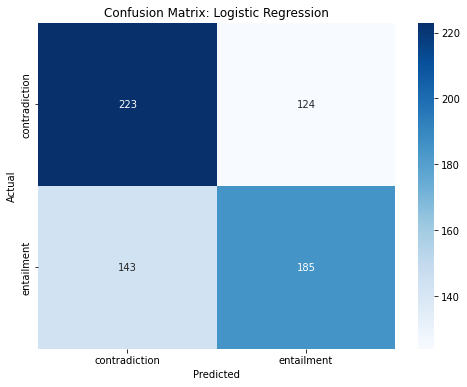

Training Random Forest...
Classification Report for Random Forest:

               precision    recall  f1-score   support

contradiction       0.68      0.60      0.64       347
   entailment       0.62      0.70      0.66       328

     accuracy                           0.65       675
    macro avg       0.65      0.65      0.65       675
 weighted avg       0.65      0.65      0.65       675

Confusion Matrix for Random Forest:

[[208 139]
 [100 228]]


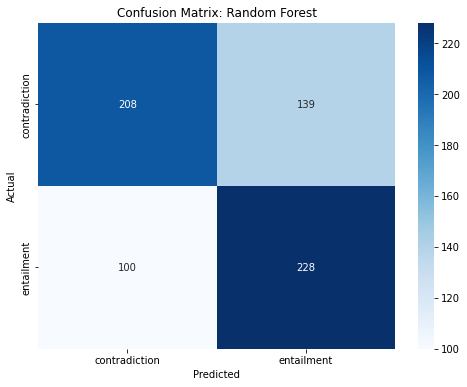

Training SVM...
Classification Report for SVM:

               precision    recall  f1-score   support

contradiction       0.60      0.62      0.61       347
   entailment       0.59      0.56      0.57       328

     accuracy                           0.59       675
    macro avg       0.59      0.59      0.59       675
 weighted avg       0.59      0.59      0.59       675

Confusion Matrix for SVM:

[[216 131]
 [143 185]]


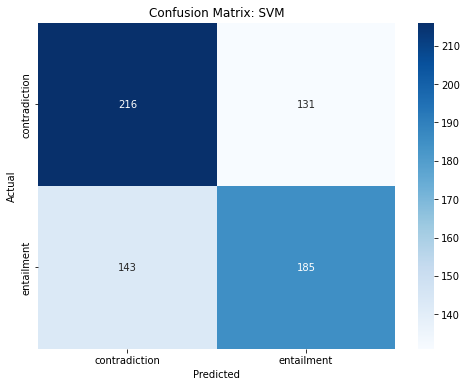

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(kernel='linear'))
]

# Loop through models, train them, and print classification reports and confusion matrices
for name, model in models:
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Print classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    print(f"Confusion Matrix for {name}:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot Confusion Matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("="*50)

# Select Best Model

In [17]:
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Print classification report
print(f"Classification Report :\n")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(f"Confusion Matrix for:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Classification Report :

               precision    recall  f1-score   support

contradiction       0.61      0.64      0.63       347
   entailment       0.60      0.56      0.58       328

     accuracy                           0.60       675
    macro avg       0.60      0.60      0.60       675
 weighted avg       0.60      0.60      0.60       675

Confusion Matrix for:

[[223 124]
 [143 185]]


# Detection System

In [18]:
def detect(inp1, inp2, model, tfidf):
    
    # Combine the input sentences as required by the model
    combined_input = inp1 + " " + inp2  
    
    combined_input = combined_input.lower()
    
    # Transform the combined input using the TF-IDF vectorizer
    transformed_input = tfidf.transform([combined_input])
    
    # Make prediction using the model
    prediction = model.predict(transformed_input)
    
    
    return prediction[0]

In [19]:
inp1 = "A man is playing a guitar."
inp2 = "A man is riding a bike."

prediction = detect(inp1, inp2, model, tfidf)
print(prediction)  # Expected output: "contradiction"


contradiction


In [20]:
inp1 = "Two people are having a conversation."
inp2 = "Two people are talking to each other."

prediction = detect(inp1, inp2, model, tfidf)
print(f"Prediction: {prediction}")  # Expected output: "entailment"


Prediction: entailment


In [21]:
inp1 = "The dog is running in the park."
inp2 = "The dog is playing in the yard."

prediction = detect(inp1, inp2, model, tfidf)
print(f"Prediction: {prediction}") 


Prediction: contradiction


In [22]:
inp1 = "A woman is jogging in the park."
inp2 = "A woman is running outside."

prediction = detect(inp1, inp2, model, tfidf)
print(f"Prediction: {prediction}")  # Expected output: "entailment"


Prediction: entailment


# Save Files

In [16]:
import pickle

pickle.dump(model,open("models/model.pkl",'wb'))
pickle.dump(tfidf,open("models/tfidf.pkl",'wb'))

In [17]:
import sklearn
sklearn.__version__

'1.4.2'